# Exercício 1 

In [77]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def plot_graph(f, a, b, n, valor_exato, title):
    x = np.linspace(a, b, 100)
    y = np.array([f.subs(sp.Symbol('x'), xi) for xi in x], dtype=float)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Função')
    
    colors = ['red', 'blue', 'green'] 
    
    for method, color in zip(['PontoMedio', 'trapezoidal', 'simpson'], colors):
        integral, error = monte_carlo_integral(f, a, b, n, method)
        plt.hlines(integral, a, b, linestyles='dashed', label=f'Aproximação ({method})', color=color)
    
    plt.hlines(valor_exato, a, b, linestyles='dotted', label='Valor Exato', color='black')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()



In [78]:
def monte_carlo_integral(f, a, b, n, method):
    x = np.random.uniform(a, b, n)
    if method == 'PontoMedio':
        y = f.subs(sp.Symbol('x'), (a + b) / 2)
    elif method == 'trapezoidal':
        y = (f.subs(sp.Symbol('x'), a) + f.subs(sp.Symbol('x'), b)) / 2
    elif method == 'simpson':
        y = (f.subs(sp.Symbol('x'), a) + 4 * f.subs(sp.Symbol('x'), (a + b) / 2) + f.subs(sp.Symbol('x'), b)) / 6
    else:
        raise ValueError("Invalid method. Choose 'PontoMedio', 'trapezoidal', or 'simpson'.")
    
    integral = float((b - a) * y)
    error = abs(integral - valor_exato)
    return integral, error

Método: PontoMedio
Aproximação: 1.648721
Erro: 0.069561

Método: trapezoidal
Aproximação: 1.859141
Erro: 0.140859

Método: simpson
Aproximação: 1.718861
Erro: 0.000579



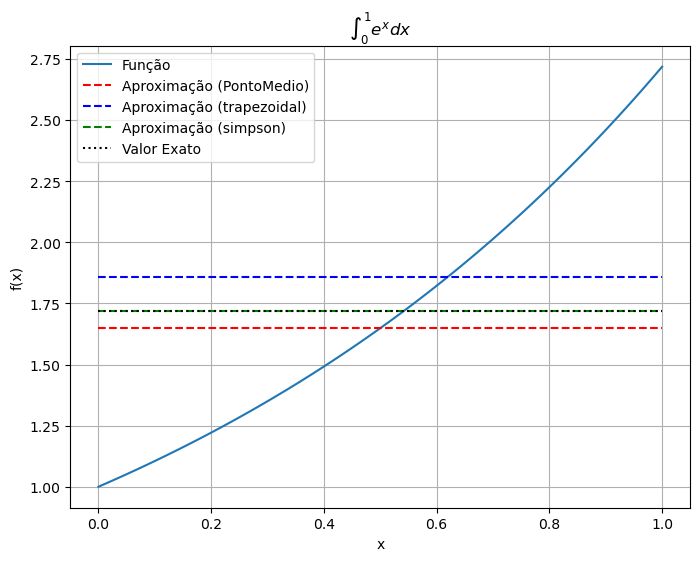

In [79]:
x = sp.Symbol('x')
f_a = sp.exp(x)
valor_exato = sp.integrate(f, (x, 0, 1))


a, b = 0, 1
n = 100000

for method in ['PontoMedio', 'trapezoidal', 'simpson']:
    integral, error = monte_carlo_integral(f_a, a, b, n, method)
    print(f"Método: {method}")
    print(f"Aproximação: {integral:.6f}")
    print(f"Erro: {error:.6f}")
    print()
valor_exato_a = float(sp.integrate(f_a, (x, 0, 1)))   
plot_graph(f_a, a, b, n, valor_exato_a, '$\int_0^1 e^x dx$')

Método: PontoMedio
Aproximação: 0.866025
Erro: 0.852256

Método: trapezoidal
Aproximação: 0.500000
Erro: 1.218282

Método: simpson
Aproximação: 0.744017
Erro: 0.974265



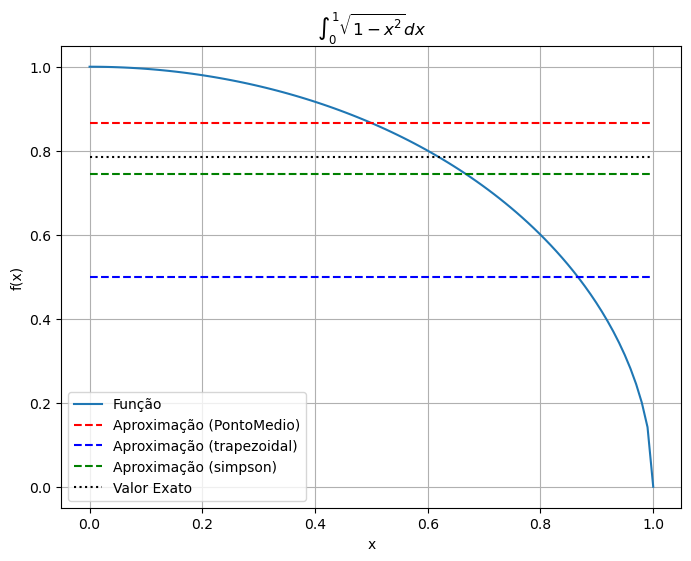

In [81]:
f_b = sp.sqrt(1 - x**2)

a, b = 0, 1
n = 100000

for method in ['PontoMedio', 'trapezoidal', 'simpson']:
    integral, error = monte_carlo_integral(f_b, a, b, n, method)
    print(f"Método: {method}")
    print(f"Aproximação: {integral:.6f}")
    print(f"Erro: {error:.6f}")
    print()
    
f_b = sp.sqrt(1 - x**2)
valor_exato_b = float(sp.integrate(f_b, (x, 0, 1)))
plot_graph(f_b, a, b, n, valor_exato_b, '$\int_0^1 \sqrt{1-x^2}dx$')


Método: PontoMedio
Aproximação: 0.778801
Erro: 0.939481

Método: trapezoidal
Aproximação: 0.683940
Erro: 1.034342

Método: simpson
Aproximação: 0.747180
Erro: 0.971101



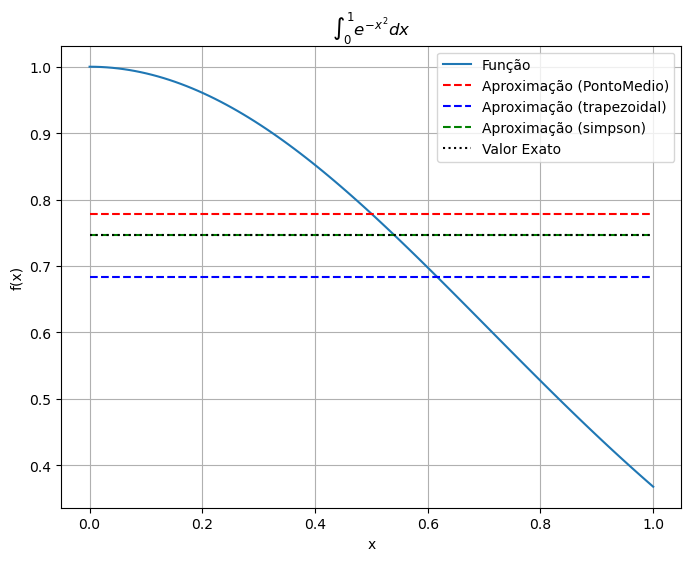

In [82]:
f_c = sp.exp(-x**2)

a, b = 0, 1
n = 100000

for method in ['PontoMedio', 'trapezoidal', 'simpson']:
    integral, error = monte_carlo_integral(f_c, a, b, n, method)
    print(f"Método: {method}")
    print(f"Aproximação: {integral:.6f}")
    print(f"Erro: {error:.6f}")
    print()
    

f_c = sp.exp(-x**2)
valor_exato_c = float(sp.integrate(f_c, (x, 0, 1)))
plot_graph(f_c, a, b, n, valor_exato_c, '$\int_0^1 e^{-x^2} dx$')


# Exercício 2


In [86]:
import time

def trapezoidal(f, a, b, n):
    start_time = time.time()
    x = np.linspace(a, b, n+1)
    y = np.array([f.subs(sp.Symbol('x'), xi) for xi in x], dtype=float)
    h = (b - a) / n
    integral = (h / 2) * (y[0] + 2 * np.sum(y[1:-1]) + y[-1])
    end_time = time.time()
    execution_time = end_time - start_time
    return integral, execution_time

In [87]:

def monte_carlo(f, a, b, n):
    start_time = time.time()
    x = np.random.uniform(a, b, n)
    y = np.array([f.subs(sp.Symbol('x'), xi) for xi in x], dtype=float)
    integral = (b - a) * np.mean(y)
    end_time = time.time()
    execution_time = end_time - start_time
    return integral, execution_time



In [88]:
def plot_graph(f, a, b, valor_exato, trapezoidal_value, monte_carlo_value, title):
    x = np.linspace(a, b, 100)
    y = np.array([f.subs(sp.Symbol('x'), xi) for xi in x], dtype=float)
    
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label='Função')
    
    plt.hlines(valor_exato, a, b, linestyles='dotted', label='Valor Exato', color='black')
    plt.hlines(trapezoidal_value, a, b, linestyles='dashed', label='Regra Trapezoidal', color='red')
    plt.hlines(monte_carlo_value, a, b, linestyles='dashed', label='Monte Carlo', color='blue')
    
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

Valor Exato: 3.141593
Regra Trapezoidal: 3.141576 (Tempo: 0.085999 segundos)
Monte Carlo: 3.137480 (Tempo: 97.874406 segundos)


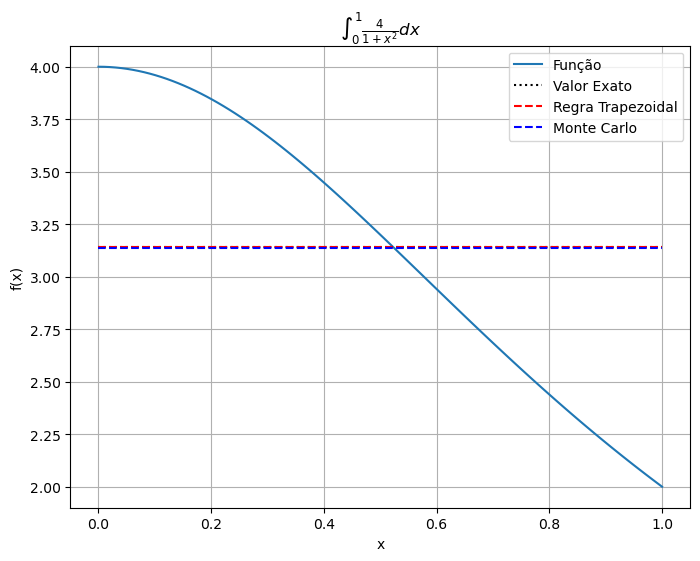

In [89]:

a, b = 0, 1
n_trapezoidal = 100
n_monte_carlo = 100000

f_2a = 4 / (1 + x**2)
valor_exato_2a = float(sp.integrate(f_2a, (x, a, b)))

trapezoidal_a, trapezoidal_time_a = trapezoidal(f_2a, a, b, n_trapezoidal)
monte_carlo_a, monte_carlo_time_a = monte_carlo(f_2a, a, b, n_monte_carlo)

print(f"Valor Exato: {valor_exato_2a:.6f}")
print(f"Regra Trapezoidal: {trapezoidal_a:.6f} (Tempo: {trapezoidal_time_a:.6f} segundos)")
print(f"Monte Carlo: {monte_carlo_a:.6f} (Tempo: {monte_carlo_time_a:.6f} segundos)")


plot_graph(f_2a, a, b, valor_exato_2a, trapezoidal_a, monte_carlo_a, '$\int_0^1 \\frac{4}{1 + x^2} dx$')


Valor Exato: 1.045301
Regra Trapezoidal: 1.044271 (Tempo: 0.035989 segundos)
Monte Carlo: 1.044778 (Tempo: 44.327973 segundos)


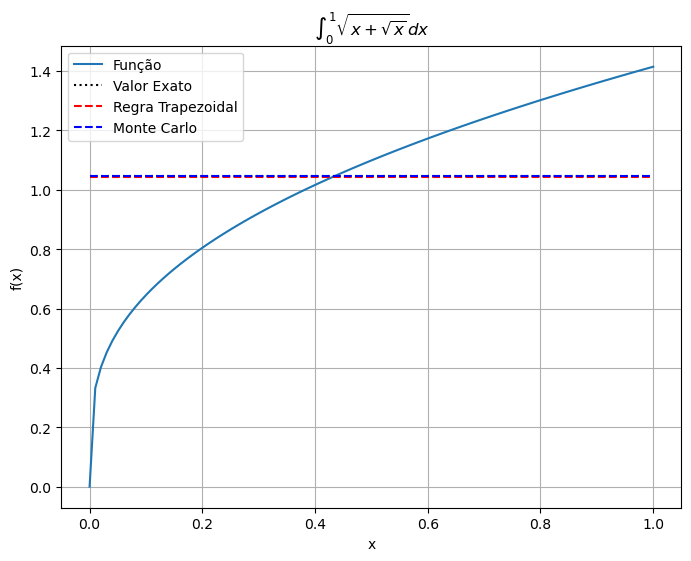

In [90]:

f_2b = sp.sqrt(x + sp.sqrt(x))
valor_exato_2b = float(sp.integrate(f_2b, (x, a, b)))

trapezoidal_b, trapezoidal_time_b = trapezoidal(f_2b, a, b, n_trapezoidal)
monte_carlo_b, monte_carlo_time_b = monte_carlo(f_2b, a, b, n_monte_carlo)

print(f"Valor Exato: {valor_exato_2b:.6f}")
print(f"Regra Trapezoidal: {trapezoidal_b:.6f} (Tempo: {trapezoidal_time_b:.6f} segundos)")
print(f"Monte Carlo: {monte_carlo_b:.6f} (Tempo: {monte_carlo_time_b:.6f} segundos)")

plot_graph(f_2b, a, b, valor_exato_2b, trapezoidal_b, monte_carlo_b, '$\int_0^1 \\sqrt{{x} + \\sqrt{x}} dx$')


# Exercício 3

Volume aproximado do objeto: 10.483992
Peso do objeto: 10.483992
Centro de massa: (2.4536385985249107, -1.5276514633446434, -0.0005636992266109836)


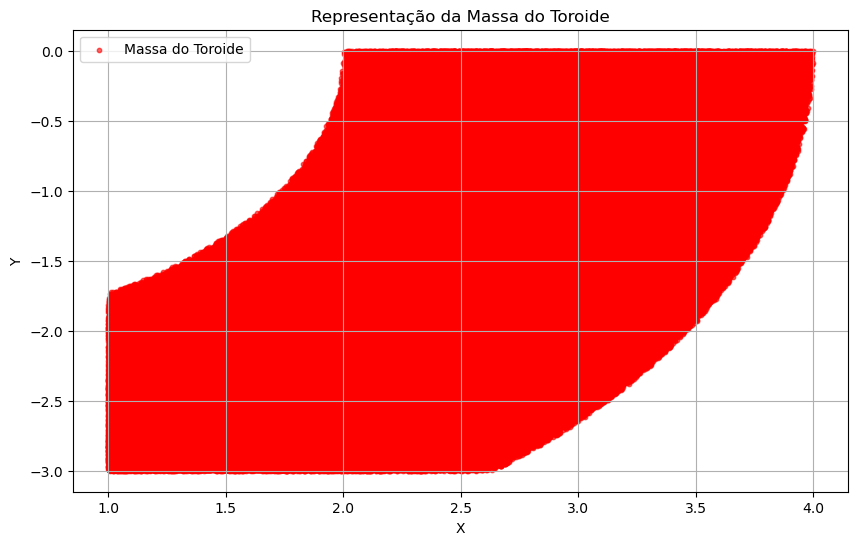

In [103]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

n = 1000000  
x_min, x_max = 1, 4
y_min, y_max = -3, 0
z_min, z_max = -1, 1

x = np.random.uniform(x_min, x_max, n)
y = np.random.uniform(y_min, y_max, n)
z = np.random.uniform(z_min, z_max, n)

cond_toroide = z**2 + (np.sqrt(x**2 + y**2) - 3)**2 <= 1

vol_cubo = (x_max - x_min) * (y_max - y_min) * (z_max - z_min)
vol_objeto = vol_cubo * np.sum(cond_toroide) / n

peso_objeto = vol_objeto  # Densidade = 1

x_cm = np.mean(x[cond_toroide])
y_cm = np.mean(y[cond_toroide])
z_cm = np.mean(z[cond_toroide])

print(f"Volume aproximado do objeto: {vol_objeto}")
print(f"Peso do objeto: {peso_objeto}")
print(f"Centro de massa: ({x_cm}, {y_cm}, {z_cm})")

plt.figure(figsize=(10, 6))
plt.scatter(x[cond_toroide], y[cond_toroide], alpha=0.6, c='r', s=10, label='Massa do Toroide')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Representação da Massa do Toroide')
plt.legend()
plt.grid(True)
plt.show()